# BUSA 523 Project
### KINGSLEY AMADI-BENNETT
### CWID:50262316


## QUESTION 1:
### Perform Exploratory Data Analysis
- What can you conclude from methods of central tendency and deviation of the variables?
- Are there any correlated variables?
- Interpret the skewness of the variables.

In [208]:
# Import the data
import pandas as pd

data = pd.read_csv("cancer.csv")

data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<AxesSubplot:>

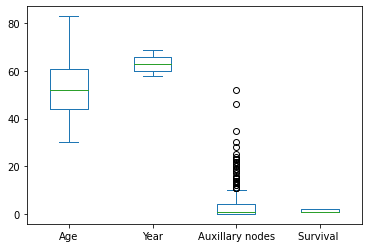

In [209]:
data.plot.box()
# As seen below, the Auxillary nodes have a lot of outliers therefore we'll be rectify these outliers

<AxesSubplot:>

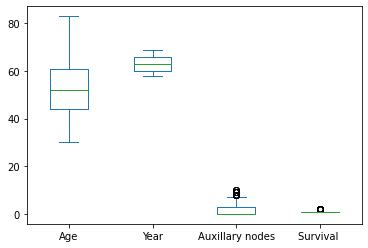

In [210]:
# Remove outliers
maximum = 4 + 1.5 * (4 - 0)

new_data = data[data["Auxillary nodes"] <= maximum]

new_data.plot.box()

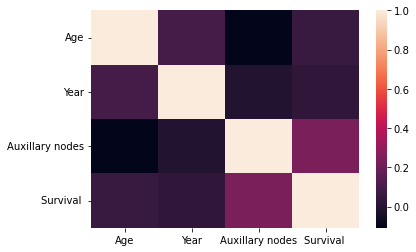

In [211]:
# Correlation
corr = new_data.corr()

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(corr)
plt.show()

# As seen below, Survival and Auxillary nodes have very little correlation and it would be needless to remove it


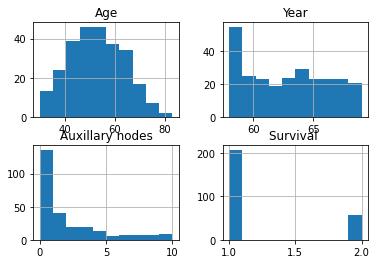

In [212]:
# Skewness
new_data.hist()


# The data for Auxillary nodes and Year are skewed to the left, thus values on the left are going to perform better in our model.
# Therefore, we need to fix the skewness of the 'Auxillary Nodes' and 'Year' column

new_data.to_csv("new data.csv")

/var/folders/z2/h5thpfkn3jq1sskx2bysywhc0000gn/T/ipykernel_43900/4126733016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Auxillary nodes"] = new_data["Auxillary nodes"] ** (0.5)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

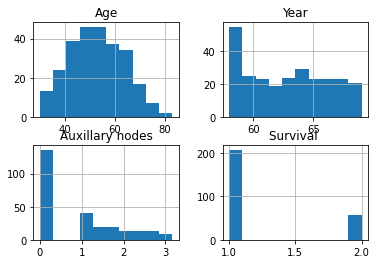

In [213]:
# Removing Skewness for Auxillary Node

new_data["Auxillary nodes"] = new_data["Auxillary nodes"] ** (0.5)

new_data.hist()

#The skewing didn't work, however I still went ahead to run it

/var/folders/z2/h5thpfkn3jq1sskx2bysywhc0000gn/T/ipykernel_43900/2601692203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Year"] = new_data["Year"] ** (0.5)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

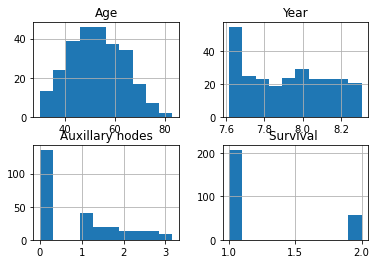

In [214]:
# Removing Skewness for Year

new_data["Year"] = new_data["Year"] ** (0.5)

new_data.hist()

#The skewing didn't work, however I still went ahead to run it

In [215]:
# Normalization - Scikit-learn

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#For Standardized
#scaler = StandardScaler()
#For Normalized
scaler = MinMaxScaler()
scaler.fit(new_data)
scaled = scaler.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled, columns = new_data.columns)

scaled_data

,Age,Year,Auxillary nodes,Survival
0,0.000000,0.373792,0.547723,0.0
1,0.000000,0.646282,0.000000,0.0
2,0.018868,0.094626,0.447214,0.0
3,0.018868,0.646282,0.632456,0.0
4,0.056604,0.000000,1.000000,0.0
...,...,...,...,...
260,0.849057,0.373792,0.316228,0.0
261,0.867925,0.824461,0.000000,0.0
262,0.886792,0.646282,0.547723,0.0
263,0.905660,0.646282,0.316228,1.0


In [216]:
# After making all the transformations, Save the data

scaled_data.to_csv("new dataa.csv")

## QUESTION 2-
### Develop Supervised learning models.

In [217]:
#Import all libraries

import pandas as pd         #For Data Manipulation
import matplotlib.pyplot as plt   #For Visualization
# Import from Sckikit learn - machine learning alrorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [218]:
# Import the Data

data = pd.read_csv("new dataa.csv")

x = data.drop(columns = "Survival ") 
y = data["Survival "]      
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, train_size = 0.6)

data

,Unnamed: 0,Age,Year,Auxillary nodes,Survival
0,0,0.000000,0.373792,0.547723,0.0
1,1,0.000000,0.646282,0.000000,0.0
2,2,0.018868,0.094626,0.447214,0.0
3,3,0.018868,0.646282,0.632456,0.0
4,4,0.056604,0.000000,1.000000,0.0
...,...,...,...,...,...
260,260,0.849057,0.373792,0.316228,0.0
261,261,0.867925,0.824461,0.000000,0.0
262,262,0.886792,0.646282,0.547723,0.0
263,263,0.905660,0.646282,0.316228,1.0


### Model Building

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        78
         1.0       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


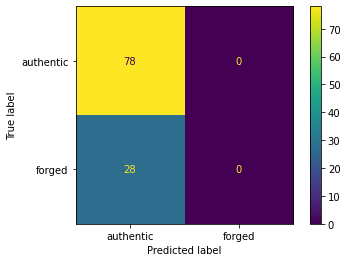

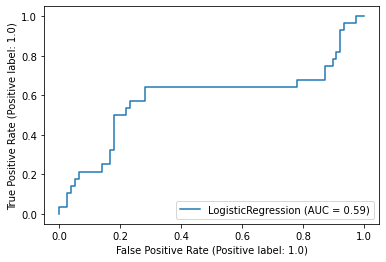

In [219]:
# Logistic Regression 
clf = LogisticRegression(solver = "liblinear", penalty = "l2", C = 1.0, random_state = 10).fit(x_train, y_train)

clf.score(x_test, y_test)
y_pred = clf.predict(x_test)

#Create labels
labels = ["authentic", "forged"]  
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
print(classification_report(y_test, y_pred, labels = clf.classes_))

#Plotting ROC curve
plot_roc_curve(clf, x_test, y_test)
plt.show()

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83        78
         1.0       0.20      0.04      0.06        28

    accuracy                           0.71       106
   macro avg       0.47      0.49      0.44       106
weighted avg       0.59      0.71      0.62       106



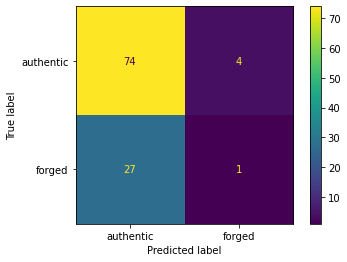

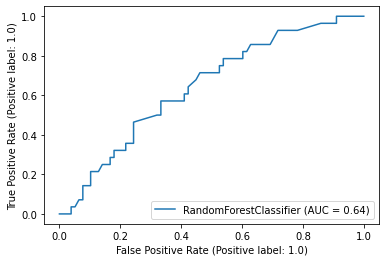

In [220]:
# Random forest

rf = RandomForestClassifier(n_estimators = 10, max_depth = 3, max_features = 'sqrt', random_state = 0).fit(x_train, y_train)

# Making predictions
rf_pred = rf.predict(x_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = rf.classes_))

#Plotting ROC curve
plot_roc_curve(rf, x_test, y_test)
plt.show()

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        78
         1.0       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


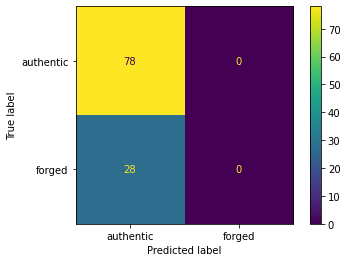

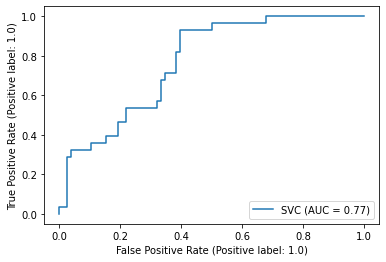

In [221]:
# Support Vector Machine

# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 1, kernel = "linear", C = 1).fit(x_train, y_train)

svm_pred = svm.predict(x_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = svm.classes_))

#Plotting ROC curve
plot_roc_curve(svm, x_test, y_test)
plt.show()

              precision    recall  f1-score   support

         0.0       1.00      0.01      0.03        78
         1.0       0.27      1.00      0.42        28

    accuracy                           0.27       106
   macro avg       0.63      0.51      0.22       106
weighted avg       0.81      0.27      0.13       106



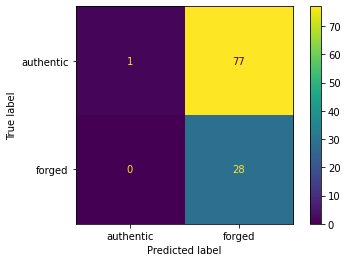

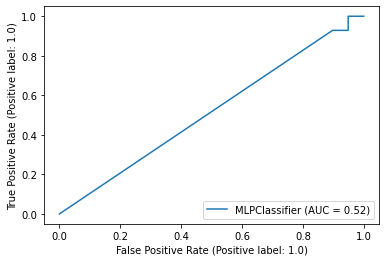

In [222]:
# Neural Network

nn = MLPClassifier(solver = 'sgd', activation = 'identity', learning_rate = 'invscaling', random_state = 1, learning_rate_init = 0.01).fit(x_train, y_train)

# Prediction
nn_pred = nn.predict(x_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = nn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = nn.classes_))

#Plotting ROC curve
plot_roc_curve(nn, x_test, y_test)
plt.show()

### Best Model
**********************
After evaluating all the models, the Support Vector Machine model having an AUC of 0.77 came out as the best model.
**********************

### K-Fold Cross Validation

In [223]:
#Cross Validation for Logistic Regression
lkf = KFold(n_splits = 10)
ltotal_splits = []

iteration = 1
for train_indices, test_indices in lkf.split(x_train):

    clf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices]) 
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))  
    ltotal_splits.append(clf.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
lavg = (sum(ltotal_splits)/10)
print(lavg)

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333
0.8108333333333333


In [224]:
#Cross Validation for Random Forest
rkf = KFold(n_splits = 10)
rtotal_splits = []

iteration = 1
for train_indices, test_indices in rkf.split(x_train):

    rf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(rf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))  
    rtotal_splits.append(rf.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
ravg = (sum(rtotal_splits)/10)
print(ravg)

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.8125
Accuracy for iteration 10 is 0.7333333333333333
0.8295833333333332


In [225]:
#Cross Validation for SVM
skf = KFold(n_splits = 10)
stotal_splits = []

iteration = 1
for train_indices, test_indices in skf.split(x_train):
    # Call in your classifier and fit it. Here we are calling in the Logistics Regression model
    svm.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])  #Here we aren't using the whole x & y data, we are indices genereated by the split
    print("Accuracy for iteration "+ str(iteration) + " is " + str(svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))  
    stotal_splits.append(svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
savg = (sum(stotal_splits)/10)
print(savg)

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333
0.8108333333333333


In [226]:
#Cross Validation for Neural Network
nkf = KFold(n_splits = 10)
ntotal_splits = []

iteration = 1
for train_indices, test_indices in nkf.split(x_train):

    nn.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(nn.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))  
    ntotal_splits.append(nn.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
navg = (sum(ntotal_splits)/10)
print(navg)

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.25
Accuracy for iteration 3 is 0.1875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.1875
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.3125
Accuracy for iteration 10 is 0.7333333333333333
0.5983333333333334


### GridSearchCV

In [227]:
#Use GridSearchCV for Logistic Regression

parameters = {'solver':('liblinear', 'sag', 'saga', 'lbfgs', 'newton-cg'), 'C':[0.01, 0.1, 1.0, 10, 100], 'penalty':('none', 'l1', 'l2', 'elasticnet')}

clf_grid = GridSearchCV(clf, parameters) 
clf_grid.fit(x_train, y_train)
clf_grid.best_params_  

# A lot of the red warnings popped up here. I tried to remove them to no avail.
# However, I still got the GridSearchCV for Logistic Regression

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reache

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converg

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages

{'C': 0.01, 'penalty': 'none', 'solver': 'sag'}

In [228]:
#Use GridSearchCV for Random Forest

parameters = {'max_features':('sqrt', 'log2'), 'n_estimators':[10, 100, 100], 'max_depth':[1, 2, 3, 4, 5]}

rf_grid = GridSearchCV(rf, parameters) 
rf_grid.fit(x_train, y_train)
rf_grid.best_params_  

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}

In [229]:
#Use GridSearchCV for SVM

parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters) 
svm_grid.fit(x_train, y_train)
svm_grid.best_params_ 

{'C': 1, 'kernel': 'linear'}

In [230]:
#Use GridSearchCV for Neural Network

parameters = {'solver':('sgd', 'adam', 'lbfgs'), 'learning_rate': ('constant', 'invscaling', 'adaptive'), 'activation': ('identity', 'logistic', 'tanh', 'relu')}

nn_grid = GridSearchCV(nn, parameters)
nn_grid.fit(x_train, y_train)
nn_grid.best_params_ 

# A lot of the red warnings popped up here. I tried to remove them to no avail.
# However, I still got the GridSearchCV for Neural Network

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.o

/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteration

{'activation': 'logistic', 'learning_rate': 'constant', 'solver': 'sgd'}

## Number 3-
### Evaluate if the algorithms are overfitting?

In [231]:
# Logistic Regression
clf.score(x_test, y_test) #Accuracy score for Logistic Regression model
ldiff = lavg - (clf.score(x_test, y_test))

print ("The model accuracy for Logistic Regression is: "+ str(clf.score(x_test, y_test)))
print ("And the accuracy of the Cross Validation is:  "+ str(lavg))
print ("The difference between both is: "+str(ldiff))
print ("")
print ("Since the Cross Validation accuracy is greater than the test accuracy score, we say that our Logistic Regression model is OVERFITTING") 

The model accuracy for Logistic Regression is: 0.7358490566037735
And the accuracy of the Cross Validation is:  0.8108333333333333
The difference between both is: 0.07498427672955976

Since the Cross Validation accuracy is greater than the test accuracy score, we say that our Logistic Regression model is OVERFITTING


In [232]:
# Random Forest
rf.score(x_test, y_test) #Accuracy score for Random Forest model
rdiff = ravg - (rf.score(x_test, y_test))

print ("The model accuracy for Logistic Regression is: "+ str(rf.score(x_test, y_test)))
print ("And the accuracy of the Cross Validation is:  "+ str(ravg))
print ("The difference between both is: "+str(rdiff))
print ("")
print ("Since the Cross Validation accuracy is greater than the test accuracy score, we say that our Random Forest model is OVERFITTING") 

The model accuracy for Logistic Regression is: 0.7264150943396226
And the accuracy of the Cross Validation is:  0.8295833333333332
The difference between both is: 0.10316823899371064

Since the Cross Validation accuracy is greater than the test accuracy score, we say that our Random Forest model is OVERFITTING


In [233]:
# Support Vector Machine
svm.score(x_test, y_test) #Accuracy score for Support Vector Machine model
sdiff = savg - (svm.score(x_test, y_test))

print ("The model accuracy for Logistic Regression is: "+ str(svm.score(x_test, y_test)))
print ("And the accuracy of the Cross Validation is:  "+ str(savg))
print ("The difference between both is: "+str(sdiff))
print ("")
print ("Since the Cross Validation accuracy is greater than the test accuracy score, we say that our Support Vector Machine model is OVERFITTING") 

The model accuracy for Logistic Regression is: 0.7358490566037735
And the accuracy of the Cross Validation is:  0.8108333333333333
The difference between both is: 0.07498427672955976

Since the Cross Validation accuracy is greater than the test accuracy score, we say that our Support Vector Machine model is OVERFITTING


In [234]:
# Neural Network
nn.score(x_test, y_test) #Accuracy score for Neural Network model
ndiff = (nn.score(x_test, y_test)) - navg

print ("The model accuracy for Logistic Regression is "+ str(nn.score(x_test, y_test)))
print ("And the accuracy of the Cross Validation is:  "+ str(navg))
print ("The difference between both is: "+str(ndiff))
print ("")
print ("Since the Cross Validation accuracy is less than the test accuracy score, we say that our Neural Network model is UNDERFITTING") 

The model accuracy for Logistic Regression is 0.7358490566037735
And the accuracy of the Cross Validation is:  0.5983333333333334
The difference between both is: 0.13751572327044015

Since the Cross Validation accuracy is less than the test accuracy score, we say that our Neural Network model is UNDERFITTING


## Number 4-
### Develop a function which can implement machine learning.

In [235]:
# I built an ML function for the SVM model, since this came out as my best model

def ML (data, LogisticRegression):
    
    #Import all libraries

    import pandas as pd         #For Data Manipulation
    import matplotlib.pyplot as plt   #For Visualization
    import time

    from sklearn.model_selection import train_test_split, KFold, GridSearchCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import roc_auc_score, plot_roc_curve
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

    data = pd.read_csv("new dataa.csv")

    x = data.drop(columns = "Survival ") 
    y = data["Survival "]   
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, train_size = 0.6)
    
    print("Data has been imported. Now building SVM model...")
    time.sleep(3)
    print("\n\n*********************************************************\n\n")
    #************************* Building the Models *******************
    # Support Vector Machine

    # Developing and fitting the Support Vector Machine
    svm = SVC(random_state = 1, kernel = "linear", C = 1).fit(x_train, y_train)

    svm_pred = svm.predict(x_test)

    cm_svm = confusion_matrix(y_test, svm_pred, labels = svm.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
    disp.plot()
    print(classification_report(y_test, svm_pred, labels = svm.classes_))

    #Plotting ROC curve
    plot_roc_curve(svm, x_test, y_test)
    plt.show()

    print("SVM Model has been built. Now running Cross Validation...")
    time.sleep(3)
    print("\n\n*********************************************************\n\n")
    #************************* Cross Validation for SVM *******************

    skf = KFold(n_splits = 10)
    stotal_splits = []

    iteration = 1
    for train_indices, test_indices in skf.split(x_train):
        # Call in your classifier and fit it. Here we are calling in the Logistics Regression model
        svm.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])  #Here we aren't using the whole x & y data, we are indices genereated by the split
        print("Accuracy for iteration "+ str(iteration) + " is " + str(svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))  
        stotal_splits.append(svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
        iteration += 1

    savg = (sum(stotal_splits)/10)
    print(savg)

    print("Cross Validation has been completed. Now running evaluation...")
    time.sleep(3)
    print("\n\n*********************************************************\n\n")
    #************************* Algorithm Evaluation *******************

    # Support Vector Machine
    svm.score(x_test, y_test)
    sdiff = savg - (svm.score(x_test, y_test))
    
    print("The model accuracy for Logistic Regression is: "+ str(svm.score(x_test, y_test))+"\nAnd the accuracy of the Cross Validation is: "+ str(savg)+"\nThe difference between both is: "+str(sdiff)+ "\nSince the Cross Validation accuracy is greater than the test accuracy score, we say that our Support Vector Machine model is OVERFITTING")
    
    
 #   return metrics

Data has been imported. Now building SVM model...


*********************************************************


              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        78
         1.0       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prasidyochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


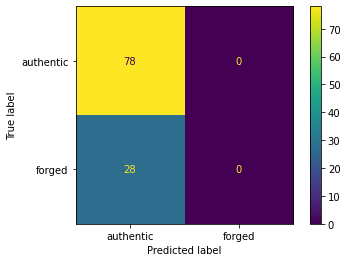

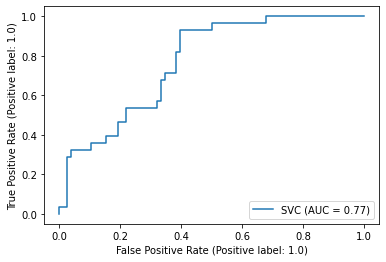

SVM Model has been built. Now running Cross Validation...


*********************************************************


Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333
0.8108333333333333
Cross Validation has been completed. Now running evaluation...


*********************************************************


The model accuracy for Logistic Regression is: 0.7358490566037735
And the accuracy of the Cross Validation is: 0.8108333333333333
The difference between both is: 0.07498427672955976
Since the Cross Validation accuracy is greater than the test accuracy score, we say that our Support Vector Machine model is OVERFITTING


In [236]:
# Test Function
ML (data, LogisticRegression)